# Домашня робота №10

# Закон великих чисел, метод Монте-Карло, центральна гранична теорема

Деякі задачі взяті з підручника

*Збірник задач з теорії ймовірностей та математичної статистики: навч. посібник / В.В. Голомозий, М.В. Карташов, К.В. Ральченко. – К.: Видавничо-поліграфічний центр «Київський університет», 2015. – 366 с.*

Електронну версію збірника можна знайти [за посиланням](http://probability.univ.kiev.ua/userfiles/kmv/gkr-problems.pdf).

In [53]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import geom, uniform, norm, expon

## 1 Закон великих чисел (посилений)

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu$.
Тоді
$$
\frac{\xi_1 + \ldots + \xi_n}{n} \to \mu, \qquad n \to \infty, \quad \text{м.н.}
$$
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.

### 1.1 Геометричний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Geom(p), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожного параметра $p = 0.05, 0.25, 0.5, 0.75, 0.95$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожного $p$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

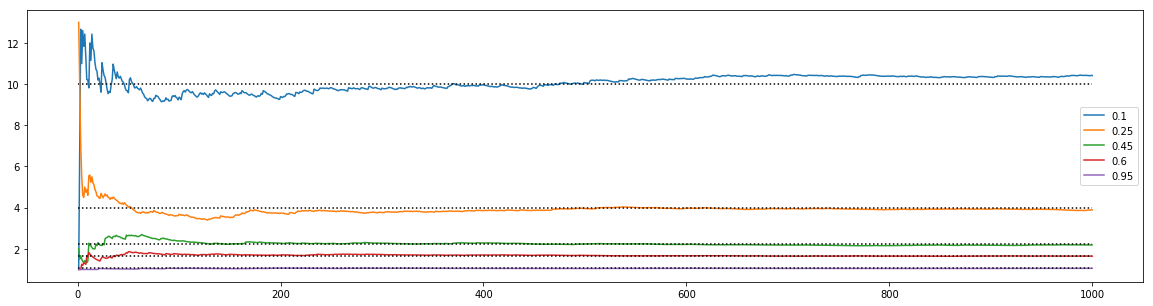

In [44]:
fig1, axs = plt.subplots(1,1, figsize=(20,5))

n = 1000
P = [0.1, 0.25, 0.45, 0.6, 0.95]  # я змінила деякі дані, щоб було наглядніше
for p in P:
    xi = geom(p)
    x = np.arange(1, n+1) 
    y = np.cumsum(xi.rvs(size=n)) / x  
    axs.plot(x, y, label = p)
    axs.plot(np.linspace(0, 1000, 10), np.ones(10) / p, color='k', linestyle=':')
    axs.legend()

### 1.2 Рівномірний розподіл

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., де $\xi_n \sim Uniform(a, b), n \geq 1$.

Зобразіть графічно збіжність із закону великих чисел для кожної пари параметрів $[a, b] = [0, 1], [-1, 1], [-2, 5]$.

Позначимо $S_n = \xi_1 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 1000$ для кожної пари $[a, b]$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

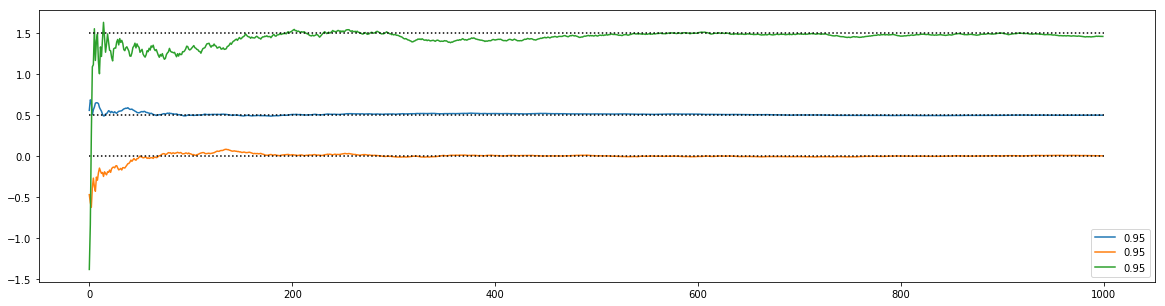

In [42]:
fig1, axs = plt.subplots(1,1, figsize=(20,5))

n = 1000
Pairs = [[0, 1], [-1, 1], [-2, 5]]  
for a, b in Pairs:
    xi = uniform(loc=a, scale=b-a)
    x = np.arange(1, n+1) 
    y = np.cumsum(xi.rvs(size=n)) / x  
    axs.plot(y, label = p)
    
    axs.plot(np.linspace(0, 1000, 10), np.ones(10) * (a+b) / 2, color='k', linestyle=':')
    axs.legend()


### 1.3 Задача 1.18.19

Випадкові величини $(\epsilon_n, n \geq -m)$ незалежні однаково розподілені та квадратично інтегровні.
Довести, що для величин $\xi_n = \sum_{k=0}^{m} c_k \epsilon_{n-k}$
виконується закон великих чисел, де $c_k$ &mdash; довільні сталі.

Нехай $\epsilon_n \sim N(0, 1)$.
Сталі $c_0, \ldots, c_m$ згенеруйте зі стандартного рівномірного розподілу.

Зобразіть графічно збіжність із закону великих чисел для $\xi_n$ для кожного параметра $m = 1, 3, 5, 10, 25, 50, 100$.

Позначимо $S_n = \xi_0 + \ldots + \xi_n$.

1. Зобразіть графік функції $\frac{S_n}{n}$ в залежності від $n = 1, \ldots, 10000$ для кожного $m$.
2. Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\frac{S_n}{n}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum` або відповідний метод.

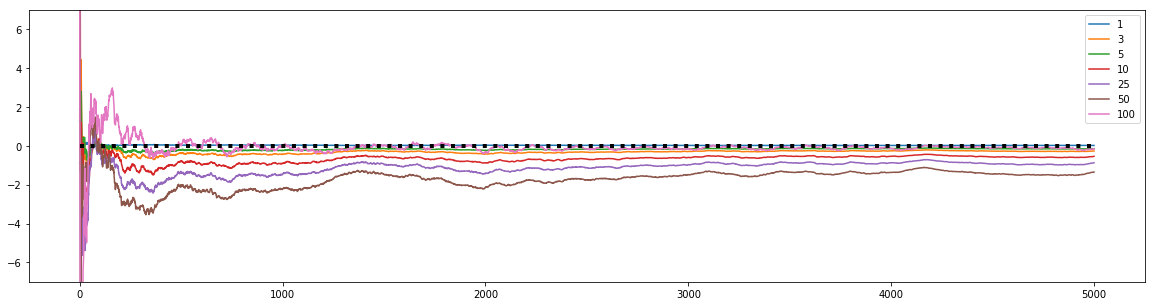

In [250]:
n = 5000

def xi(c, e):
    res = []
    for i in range(n+1):
        res.append(np.sum(c * e[i:i+m+1]))
    return res
    
fig1, axs = plt.subplots(1,1, figsize=(20,5))

M = [1, 3, 5, 10, 25, 50, 100] 
c = uniform.rvs(loc=-5, scale=10, size=101)
e = norm.rvs(loc=0, scale=1, size=n+101)
for m in M:
    xi_rvs = xi(c[:m+1], e[:n+m+1])
    y = np.cumsum(xi_rvs)[1:] / np.arange(1, n+1)  
    axs.plot(y, label = m)
    
    
axs.plot(np.linspace(0, n, 10), np.zeros(10), color='k', linestyle=':', lw=4)
axs.set_ylim(-7, 7)
axs.legend()
plt.show()


## 2 Метод Монте-Карло

Метод Монте-Карло полягає в наближеному обчисленні інтегралів за допомогою випадкових величин.
$$
\idotsint_{A} f \left( \overrightarrow{x} \right) \, d\overrightarrow{x} 
= \idotsint_{\mathbf{R^d}} f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= \idotsint_{\mathbf{R^d}}
\frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)}
f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right) \, d\overrightarrow{x}
= E \left[ \frac{f \left( \overrightarrow{x} \right) I_{A} \left( \overrightarrow{x} \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{x} \right)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f \left( \overrightarrow{\xi}_i \right) I_{A} \left( \overrightarrow{\xi}_i \right)}
{f_{\overrightarrow{\xi}} \left( \overrightarrow{\xi}_i \right)},
$$
де $f$ &mdash; деяка функція,
$I_B$ &mdash; індикатор множини $B$,
$\overrightarrow{\xi}, \overrightarrow{\xi}_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $C \supset A$
зі щільністю $f_{\overrightarrow{\xi}}$.

Або, в одномірному випадку,
$$
\int_{a}^{b} f(x) \, dx
= \int_{-\infty}^{+\infty} f(x) I_{(a, b)}(x) \, dx
= \int_{-\infty}^{+\infty} \frac{f(x) I_{(a, b)}(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi) I_{(a, b)}(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)},
$$
де $a, b \in \mathbf{R} \cup \{-\infty, +\infty\}$,
$I_B$ &mdash; індикатор множини $B$,
$f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в. на множині $A \supset (a, b)$ зі щільністю $f_{\xi}$.

Або
$$
\int_{A} f(x) \, dx
= E\left[ f(\xi) \right] m(A)
\approx \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A),
$$
де $f$ &mdash; деяка функція,
$\xi, \xi_i, i = 1, \ldots, n$, &mdash; н.о.р.в.в., рівномірно розподілені на множині $A$.

### 2.1 Завдання 2.1

Порахуйте наближено $\displaystyle \int_{0}^{1} \sin x \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$
в залежності від $n = 1, \ldots, 1000$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} f(\xi_i) m(A)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** При розв'язанні даної задачі зручно взяти $\xi_i \sim Uniform(0, 1)$.

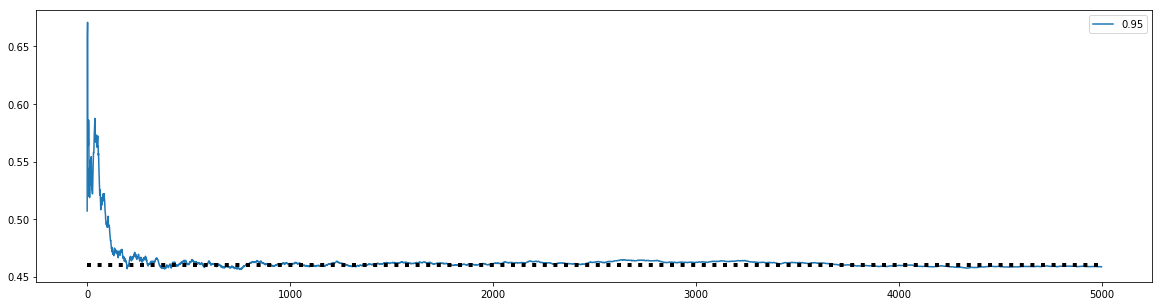

In [218]:
fig1, axs = plt.subplots(1,1, figsize=(20,5))

xi = uniform(loc=0, scale=1)
n = 5000

x = np.arange(1, n+1) 
y = np.cumsum(np.sin(xi.rvs(size=n))) / x  
axs.plot(y, label = p)
real_val = np.cos(0) - np.cos(1)
axs.plot(np.linspace(0, n, 10), np.ones(10) * real_val, color='k', linestyle=':', lw=4)
axs.legend()

plt.show()

### 2.2 Завдання 2.2

Порахуйте наближено $\displaystyle \int_{1}^{\infty} \frac{1}{x^3} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim Exp(1)$.
2. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
3. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.
4. Порівняйте точність наближення з пунктів $1, 2$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

**Зауваження 2.** Замість введення індикатора можна взяти такі $\xi_i$, що $(\xi_i - 1) \sim Exp(1)$.
Тобто поставити параметр `loc=1`.
Тоді
$$
\int_{1}^{\infty} f(x) \, dx
= \int_{1}^{\infty} \frac{f(x)}{f_{\xi}(x)} f_{\xi}(x) \, dx
= E\left[ \frac{f(\xi)}{f_{\xi}(\xi)} \right]
\approx \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i)}{f_{\xi}(\xi_i)}.
$$

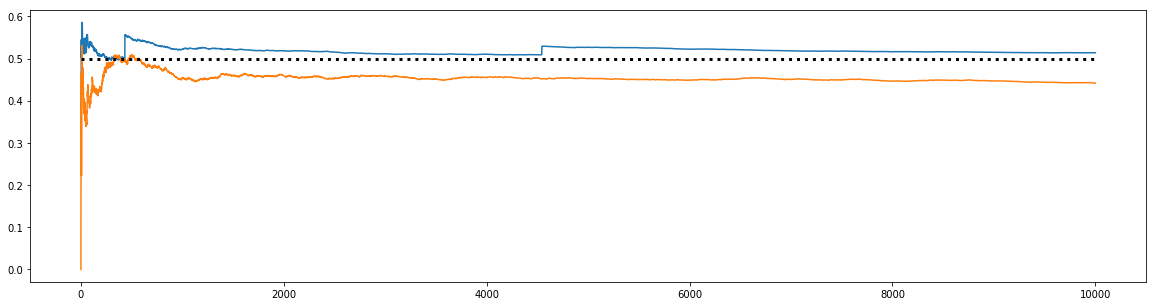

mu(exp) = 0.5137339382826892,
mu(norm) = 0.4417136424877189


In [147]:
def f1(x):
    return 1 / x ** 3

def f2(x):
    for i in range(len(x)):
        if x[i] >= 1:
            x[i] = f1(x[i])
        else:
            x[i] = 0
    return x

    
fig1, axs = plt.subplots(1,1, figsize=(20,5))
n = 10000

xi = expon(loc=1, scale=1)
xi_rvs = xi.rvs(size=n)

eta = norm(loc=1, scale=1)
eta_rvs = eta.rvs(size=n)

x = np.arange(1, n+1) 
y1 = np.cumsum(f1(xi_rvs) / xi.pdf(xi_rvs)) / x  
y2 = np.cumsum(f2(eta_rvs) / eta.pdf(eta_rvs)) / x  
axs.plot(x, y1, x, y2)
axs.plot(np.linspace(0, n, 10), np.ones(10) * 0.5, color='k', linestyle=':', lw=3)
plt.show()

print("mu(exp) = {},\nmu(norm) = {}".format(y1[-1], y2[-1]))

### 2.3 Завдання 2.3

Порахуйте наближено $\displaystyle \int_{-\infty}^{+\infty} e^{-|x|} \, dx$ за допомогою метода Монте-Карло.

1. Зобразіть графік функції $\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$
в залежності від $n = 1, \ldots, 10000$,
де $\xi, \xi_i \sim N(0, 1)$.
2. Додайте горизонтальну пряму, яка відповідає теоретичному значенню інтеграла, тобто до якого прямує вираз
$\displaystyle \frac{1}{n} \sum_{i=1}^{n} \frac{f(\xi_i) I_{(a, b)}(\xi_i)}{f_{\xi}(\xi_i)}$.

**Зауваження.** При розв'язанні даної задачі зручно використовувати функцію `numpy.cumsum`.

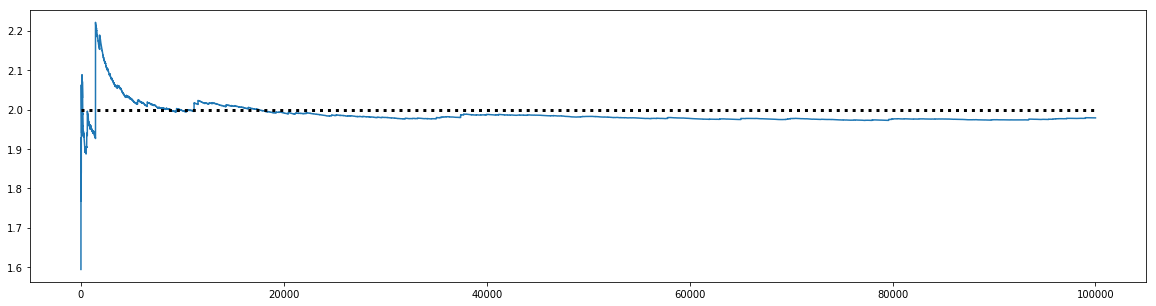

mu =  1.9787191298785147


In [138]:
def f(x):
    return np.exp(-abs(x))

fig1, axs = plt.subplots(1,1, figsize=(20,5))
n = 100000

eta = norm(loc=0, scale=1)
eta_rvs = eta.rvs(size=n)

x = np.arange(1, n+1) 
y = np.cumsum(f(eta_rvs) / eta.pdf(eta_rvs)) / x  
axs.plot(x, y)
axs.plot(np.linspace(0, n, 10), np.ones(10) * 2, color='k', linestyle=':', lw=3)
plt.show()

print("mu = ", y[-1])


## 3 Центральна гранична теорема

Нехай $(\xi_n, n \geq 1)$ &mdash; н.о.р.в.в., $E[\xi_1] = \mu, D(\xi_1) = \sigma^2$.
Позначимо також $S_n = \xi_1 + \ldots + \xi_n$.
Тоді
$$
\sqrt{n} \left( \frac{S_n}{n} - \mu \right) = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu) \to \zeta,
\qquad n \to \infty,
$$
де $\zeta \sim N(0, \sigma^2)$.

### 3.1 Експоненційний розподіл

Нехай $(\xi_k, k \geq 1)$ &mdash; н.о.р.в.в., де $\xi_k \sim Exp(1), k \geq 1$.

Зобразіть графічно збіжність із центральної граничної теореми.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100, 200$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle \frac{1}{\sqrt{n}} \sum_{i=1}^{n} (\xi_i - \mu)$, де $\mu = E[\xi_1]$;
- графік функції щільності $\zeta \sim N(0, \sigma^2)$, де $\sigma^2 = D(\xi_1)$.

**Зауваження.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функцію `numpy.sum(axis=1)`.

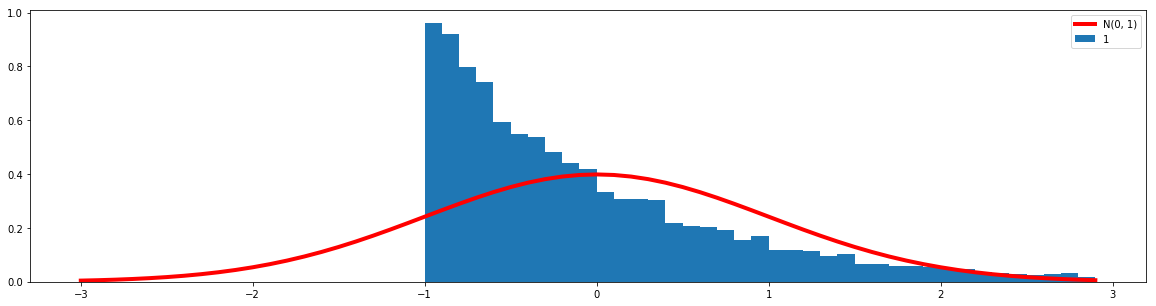

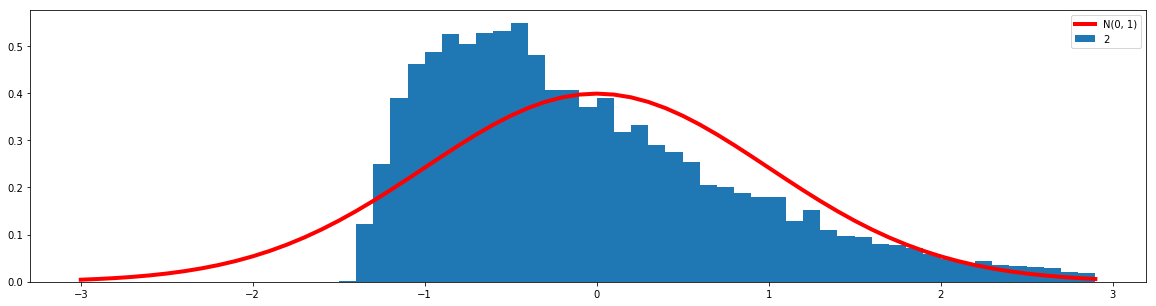

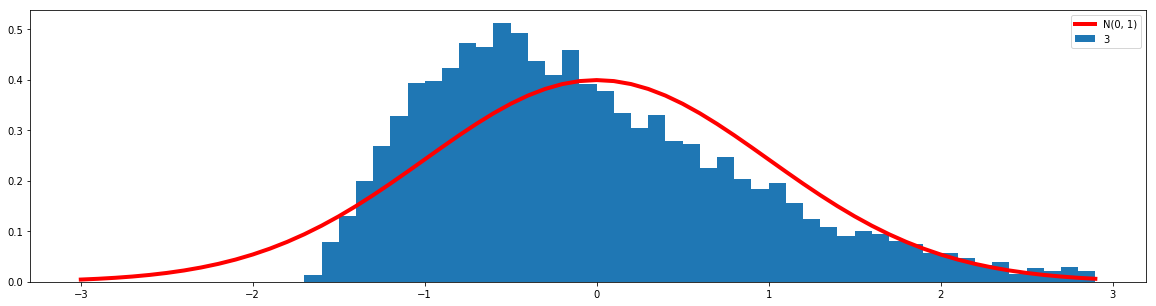

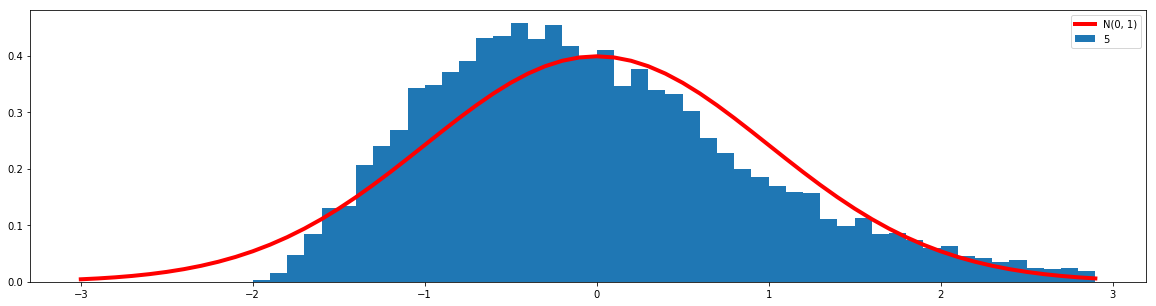

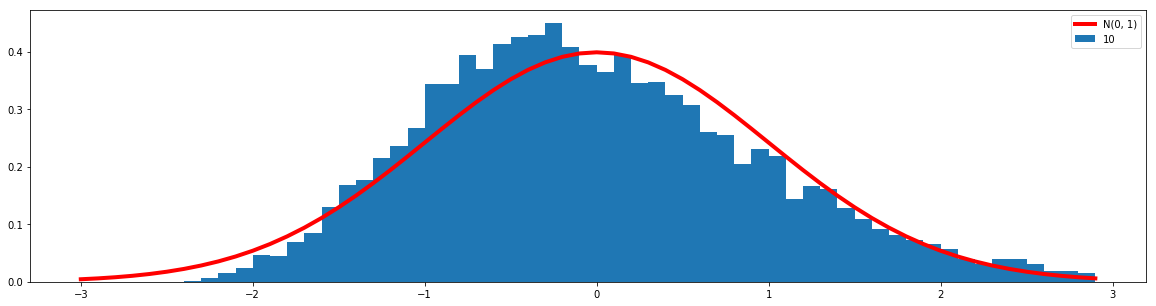

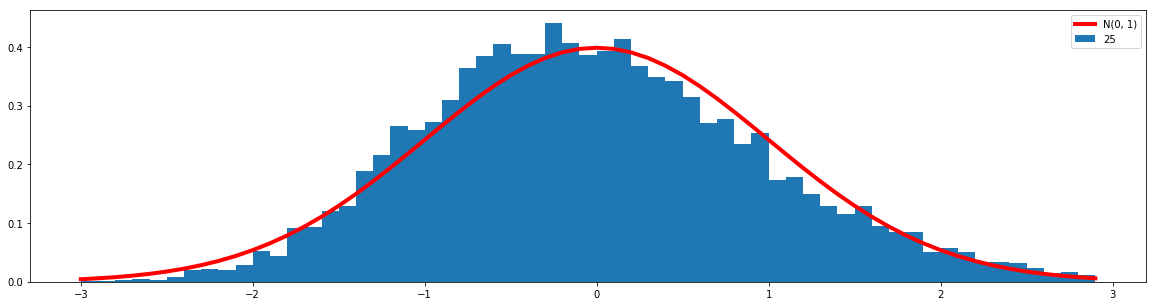

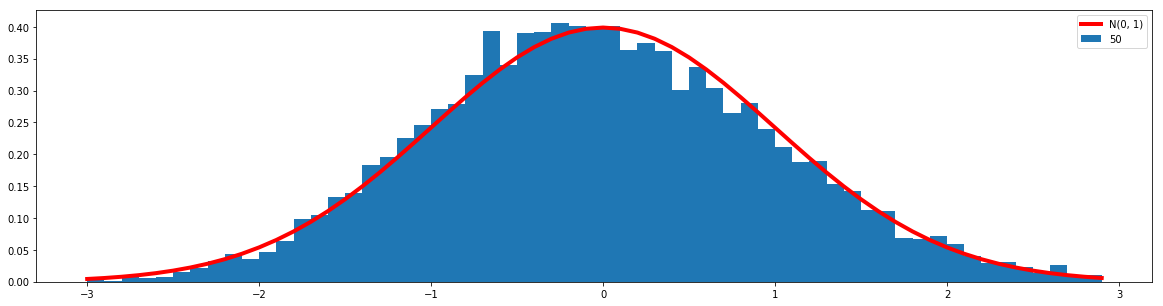

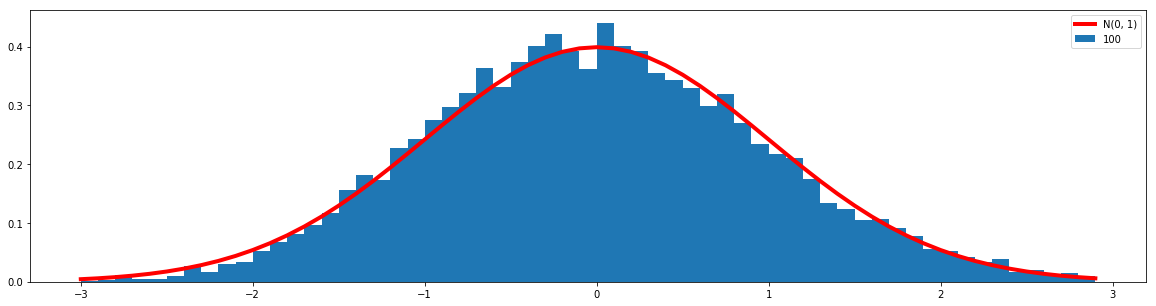

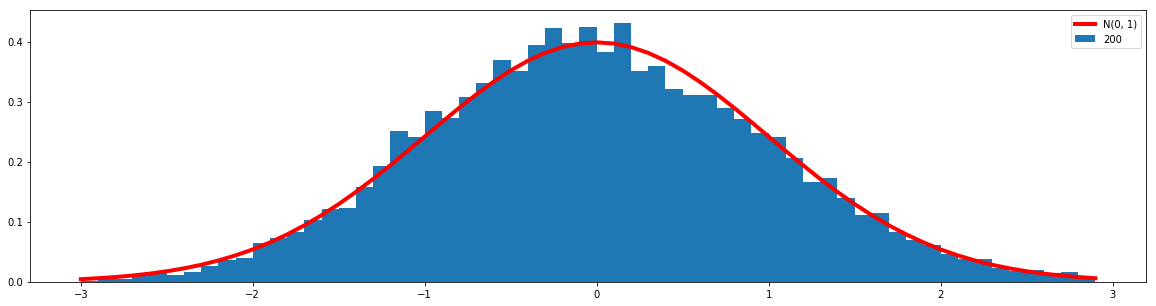

In [194]:
N = [1, 2, 3, 5, 10, 25, 50, 100, 200]
n_samples = 10000

xi = expon(loc=0, scale=1)
mu, s = xi.stats()
zeta = norm(loc=0, scale=s)

x = np.arange(-3, 3, 0.1)
for n in N:
    fig, axs = plt.subplots(1,1, figsize=(20,5))
    xi_rvs = xi.rvs(size=n * n_samples).reshape((n_samples, n))
    vals = np.sum(xi_rvs - mu, axis=1) / np.sqrt(n)
    axs.hist(vals, density=True, bins = x, label=n)
    axs.plot(x, zeta.pdf(x), lw=4, color='r', label="N(0, 1)")
    axs.legend()

plt.show()


### 3.2 Задача 1.23.24

Випадкові величини $(\xi_k, k \geq 1)$ невід'ємні незалежні однаково розподілені, $E[\xi_1] = 1, D(\xi_1) = \sigma^2$.
Довести, що
$\displaystyle 2 \left( \sqrt{\xi_1 + \ldots + \xi_n} - \sqrt{n} \right)
\xrightarrow{w} \sigma \zeta \sim N(0, \sigma^2), \quad n \to \infty$.

Нехай $\xi_k \sim Exp(1)$.

Зобразіть графічно описану в задачі збіжність.

Для кожного $n = 1, 2, 3, 5, 10, 25, 50, 100$ зобразіть:
- нормовану гістограму $n\_samples = 10000$ значень виразу
$\displaystyle 2 \left( \sqrt{\xi_1 + \ldots + \xi_n} - \sqrt{n} \right)$;
- графік функції щільності $\sigma \zeta \sim N(0, \sigma^2)$.

**Зауваження 1.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.sum(axis=1)`.

**Зауваження 2.** $\xrightarrow{w}$ означає *слабку збіжність* (від англ. *weak*) або *збіжність за розподілом*.
$\xi_n \xrightarrow{w} \xi, n \to \infty$, якщо $P(\xi_n < x) \to P(\xi < x), n \to \infty$,
в усіх точках неперервності функції розподілу випадкової величини $\xi$.

**Зауваження 3.** Якщо $\sigma \zeta \sim N(0, \sigma^2)$, то $\zeta \sim N(0, 1)$.

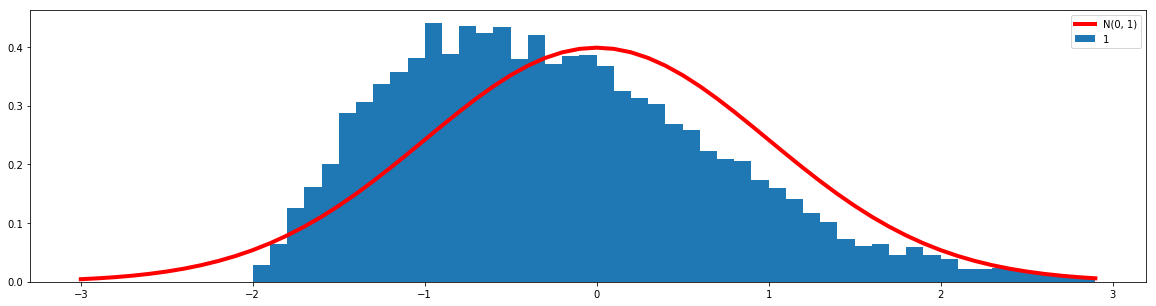

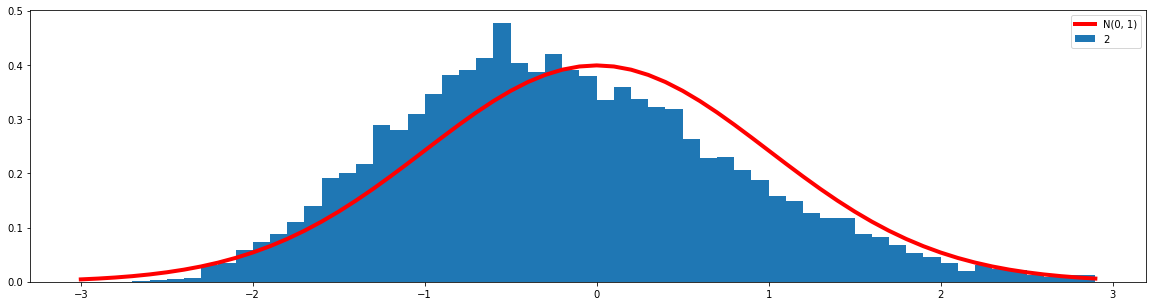

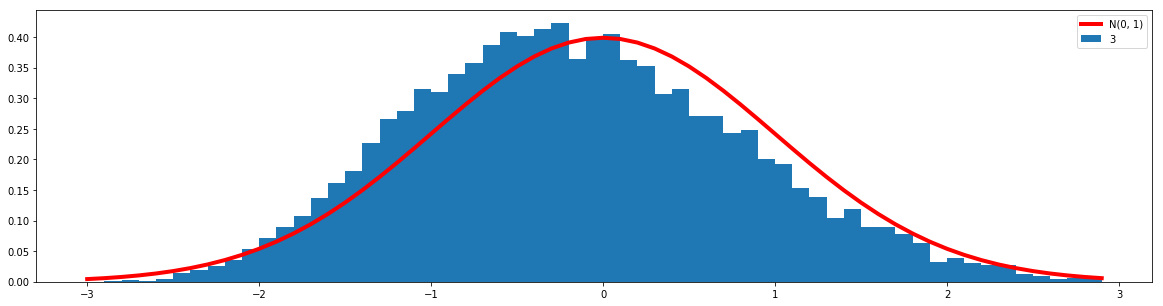

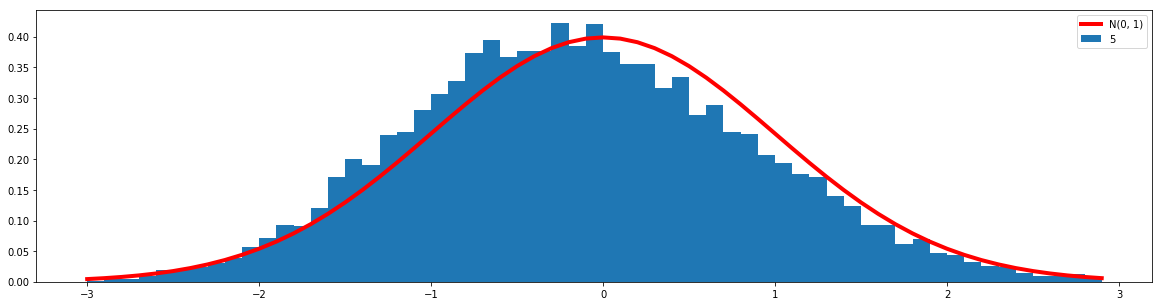

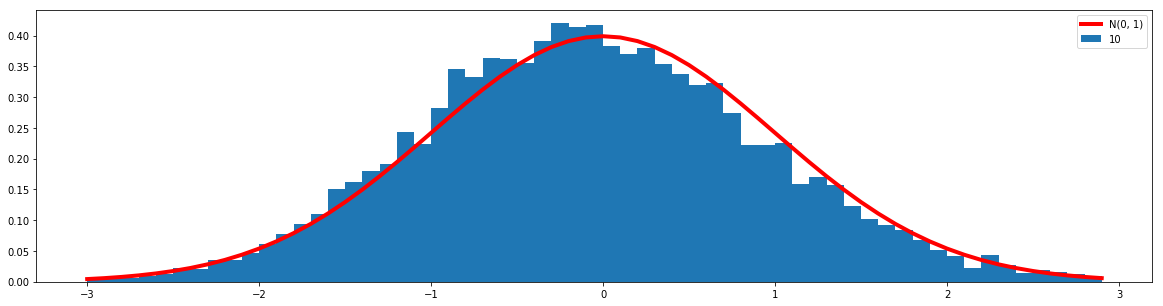

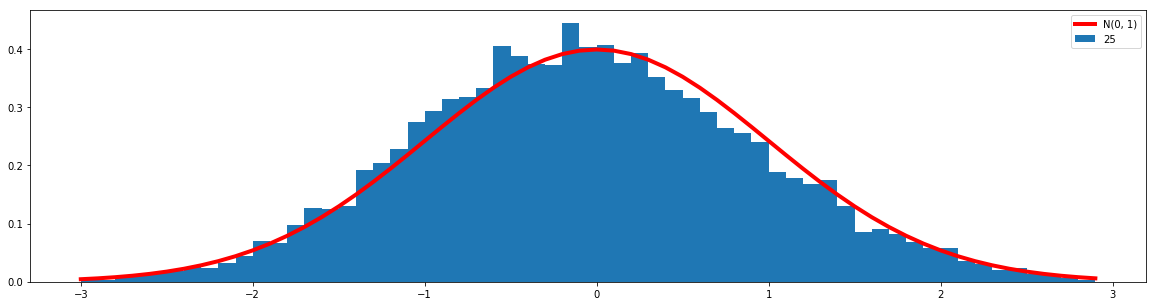

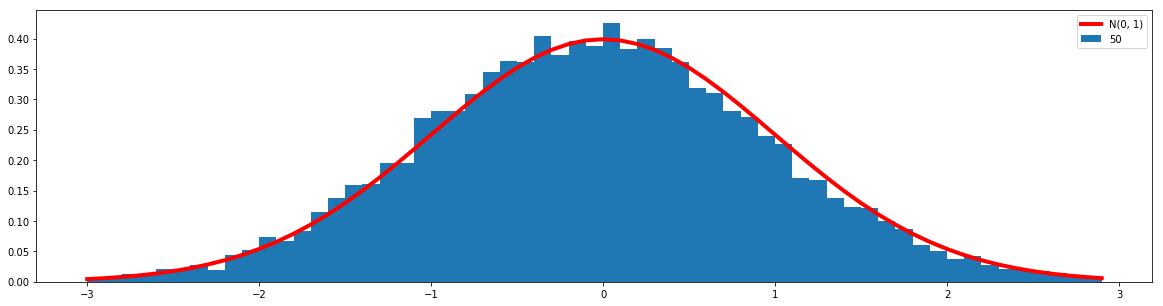

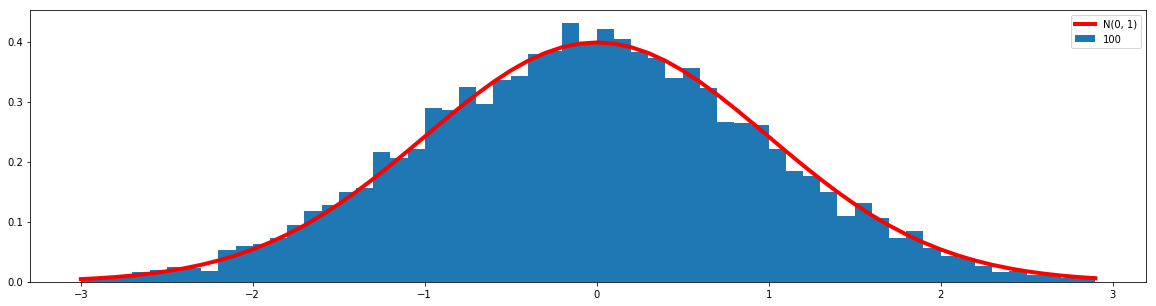

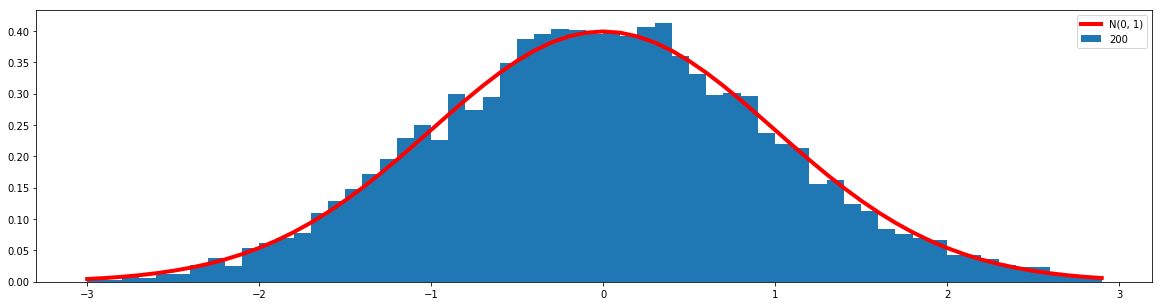

In [195]:
N = [1, 2, 3, 5, 10, 25, 50, 100, 200]
n_samples = 10000

xi = expon(loc=0, scale=1)
mu, s = xi.stats()
zeta = norm(loc=0, scale=s)

x = np.arange(-3, 3, 0.1)
for n in N:
    fig, axs = plt.subplots(1,1, figsize=(20,5))
    xi_rvs = xi.rvs(size=n * n_samples).reshape((n_samples, n))
    vals = 2 * (np.sqrt(np.sum(xi_rvs, axis=1)) - np.sqrt(n))
    axs.hist(vals, density=True, bins = x, label=n)
    axs.plot(x, zeta.pdf(x), lw=4, color='r', label="N(0, 1)")
    axs.legend()

plt.show()

### 3.3 Задача 1.18.35

Випадкові величини $(\xi_k, k \geq 1)$ незалежні рівномірно розподілені:
$\xi_k \sim Uniform(0, 1), \xi_{(1:n)} = \min_{1 \leq k \leq n} \xi_k, \xi_{(n:n)} = \max_{1 \leq k \leq n} \xi_k$.
Довести, що:
$\displaystyle
\xi_{(1:n)} \xrightarrow{P} 0,
\xi_{(n:n)} \xrightarrow{P} 1,
n \xi_{(1:n)} \xrightarrow{P} \zeta,
n \left( 1 - \xi_{(n:n)} \right) \xrightarrow{P} \zeta,
\quad n \to \infty$, де $\zeta \sim Exp(1)$.

Зобразіть графічно описані в задачі збіжності.

1. Реалізуйте 2 сабплоти в 1 рядку.
2. На першому сабплоті:
   - Зобразіть графік функції $\xi_{(1:n)}$ в залежності від $n = 1, \ldots, 1000$.
   - Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\xi_{(1:n)}$.
3. На другому сабплоті:
   - Зобразіть графік функції $\xi_{(n:n)}$ в залежності від $n = 1, \ldots, 1000$.
   - Додайте горизонтальну пряму, яка відповідає значенню, до якого прямує вираз $\xi_{(n:n)}$.
4. Для кожного $n = 1, 2, 3, 5, 10$ реалізуйте два сабплоти:
   1. На першому сабплоті зобразіть:
      - нормовану гістограму $n\_samples = 10000$ значень виразу $n \xi_{(1:n)}$;
      - графік функції щільності $\zeta \sim Exp(1)$.
   2. На другому сабплоті зобразіть:
      - нормовану гістограму $n\_samples = 10000$ значень виразу $n \left( 1 - \xi_{(n:n)} \right)$;
      - графік функції щільності $\zeta \sim Exp(1)$.

**Зауваження 1.** При розв'язанні даної задачі зручно використовувати функції `numpy.minimum.accumulate` та `numpy.maximum.accumulate`.

**Зауваження 2.** $\xrightarrow{P}$ означає *збіжність за ймовірністю*.

**Зауваження 3.** Виходить, що для розв'язання задачі необхідно генерувати $(n\_samples \cdot n)$ випадкових величин $\xi_i$.
З ними зручно буде працювати у формі матриці розміру $n\_samples \times n$.
Тоді можна використати функції `numpy.min(axis=1)` та `numpy.max(axis=1)`.

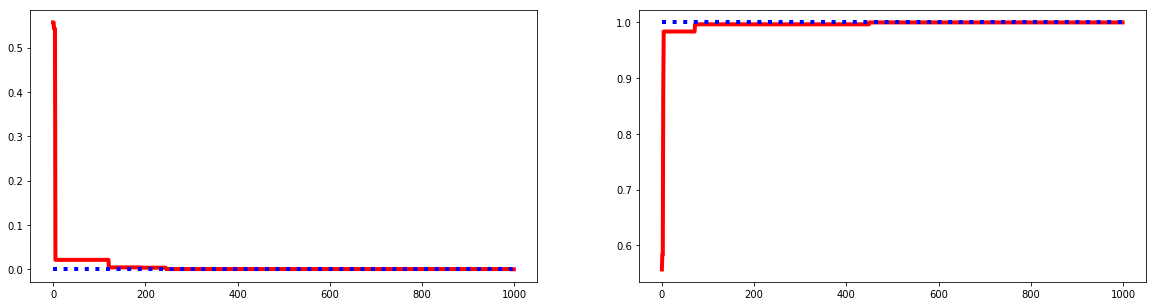

In [204]:
xi = uniform(loc=0, scale=1)
xi_rvs = xi.rvs(size=1000)

fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].plot(np.minimum.accumulate(xi_rvs), lw=4, color='r')
axs[0].plot(np.linspace(0, 1000, 10), np.ones(10) * 0, color='b', lw = 4, ls=':')

axs[1].plot(np.maximum.accumulate(xi_rvs), lw=4, color='r')
axs[1].plot(np.linspace(0, 1000, 10), np.ones(10) * 1, color='b', lw=4, ls=':')

plt.show()

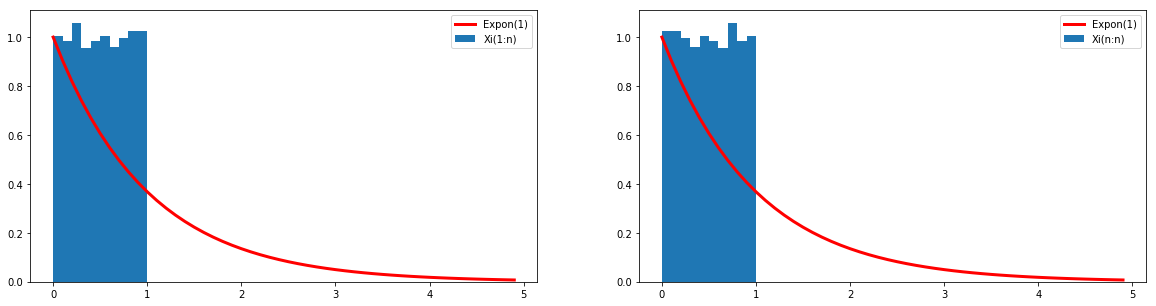

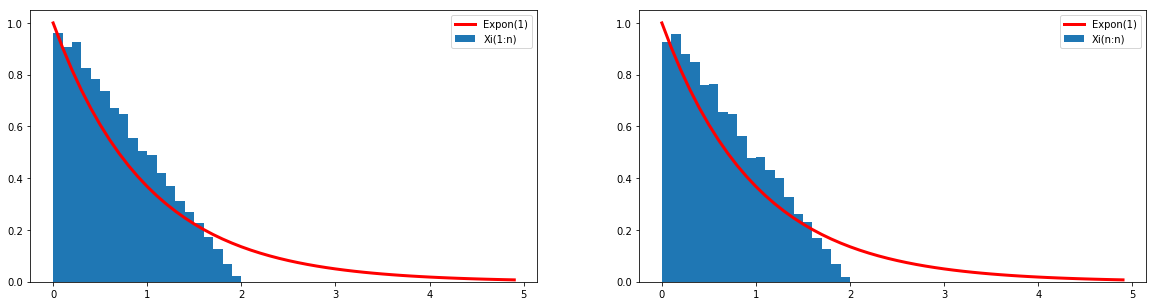

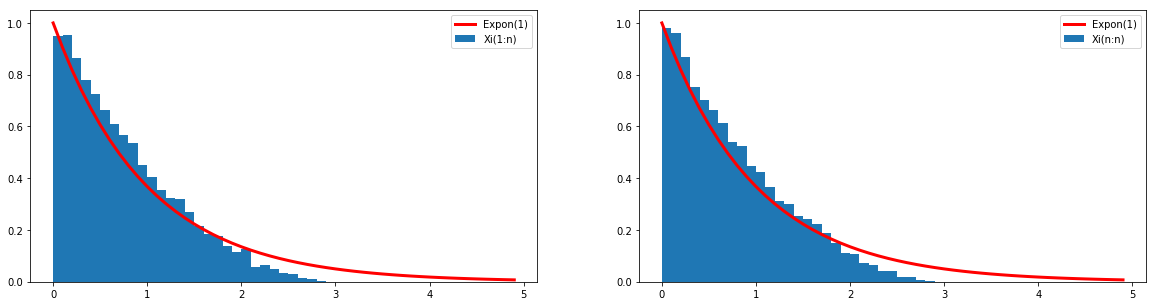

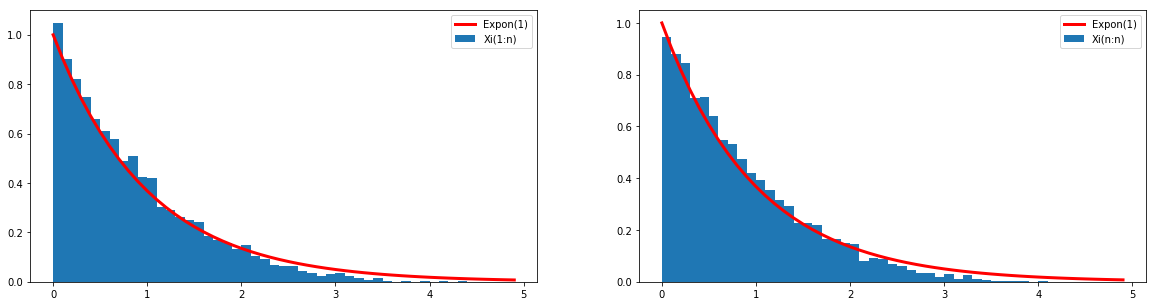

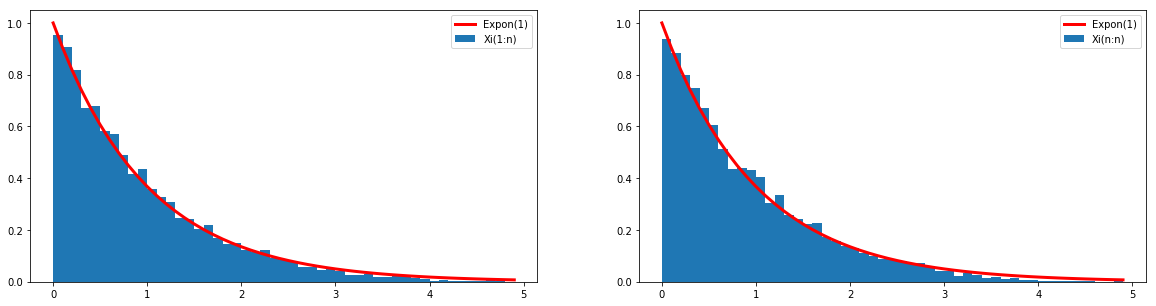

In [217]:
xi = uniform(loc=0, scale=1)
zeta = expon(loc=0, scale=1)

N = [1, 2, 3, 5, 10]
n_samples = 10000

x = np.arange(0, 5, 0.1)
for n in N:
    fig, axs = plt.subplots(1,2, figsize=(20,5))
    xi_rvs = xi.rvs(size=n * n_samples).reshape((n_samples, n))
    axs[0].hist(n * np.min(xi_rvs, axis=1), density=True, bins = x, label="Xi(1:n)")
    axs[0].plot(x, zeta.pdf(x), color='r', lw=3, label="Expon(1)")
    axs[0].legend()

    axs[1].hist(n * (1 - np.max(xi_rvs, axis=1)), density=True, bins = x, label="Xi(n:n)")
    axs[1].plot(x, zeta.pdf(x), color='r', lw=3, label="Expon(1)")
    axs[1].legend()

plt.show()